In [1]:
import pandas as pd

#text preprocessing
import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [6]:
from platform import python_version
from IPython.display import display, HTML
print('Python', python_version())
display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 95%; }
    div#header-container      { width: 95%; }
    div#maintoolbar-container { width: 95%; }""
</style>
"""))

Python 3.7.6


In [2]:
df = pd.read_csv("../data/tweets&logreturns.csv", index_col = 0)

In [3]:
df

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,hashtag,mention,created_date,created_time,passedClosing,Date,^GSPC,VGT
0,Twitter for iPhone,RT @TyCardon: Regardless who you’re pulling fo...,2020-09-29 22:51:43,30926,0,True,1311136617327984640,[],[],2020-09-29,22:51:43,1,2020-09-30,0.008220,0.007412
1,Twitter for iPhone,RT @realDonaldTrump: Rigged Election!,2020-09-29 22:37:44,66647,0,True,1311133095651717123,[],[],2020-09-29,22:37:44,1,2020-09-30,0.008220,0.007412
2,Twitter for iPhone,Volunteer to be a Trump Election Poll Watcher....,2020-09-29 22:30:39,14609,48540,False,1311131311965306885,['#MakeAmericaGreatAgain'],[],2020-09-29,22:30:39,1,2020-09-30,0.008220,0.007412
3,Twitter for iPhone,“EPA: One Trillion Trees Initiative will build...,2020-09-29 22:26:18,10408,36582,False,1311130217348345856,[],[],2020-09-29,22:26:18,1,2020-09-30,0.008220,0.007412
4,Twitter for iPhone,Joe Biden could not name a single Law Enforcem...,2020-09-29 22:15:30,4988,20767,False,1311127502954196993,[],[],2020-09-29,22:15:30,1,2020-09-30,0.008220,0.007412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26074,Twitter for Android,Well the year has officially begun. I have man...,2016-01-01 18:00:09,2642,8495,False,683060169677344768,[],[],2016-01-01,18:00:09,1,2016-01-04,-0.015422,-0.015635
26075,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're...,2016-01-01 16:29:56,933,3330,False,683037464504745985,[],"['@sprinklermanus', '@CNN', '@realDonaldTrump']",2016-01-01,16:29:56,1,2016-01-04,-0.015422,-0.015635
26076,Twitter for Android,@jallenaip: Hillary said she was in a Fog of W...,2016-01-01 01:08:06,2721,7490,False,682805477168779264,[],['@jallenaip'],2016-01-01,01:08:06,0,2016-01-04,-0.015422,-0.015635
26077,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my...,2016-01-01 01:07:28,1948,8258,False,682805320217980929,['#MarALago'],[],2016-01-01,01:07:28,0,2016-01-04,-0.015422,-0.015635


### text preprocessing

In [4]:
def text_processing(text, 
                    lower=True, 
                    remove_url=True, 
                    remove_punctuation=True, 
                    lemmatize=True,
                    remove_stopwords=True):
    '''
    Accepts a text and options to run the following processing functions:
    '''
    # strip non-ascii characters
    text = text.encode('ascii', errors='ignore')
    text = str(text.decode("utf-8"))

    # covert to lowercase
    if lower:
        text = text.lower()

    # remove url 
    if remove_url:
        text = re.sub(r'http\S+', '', text)
    
    # remove punctuation
    if remove_punctuation:
        text = text.translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
        
    # remove unnecessary new lines and whitespaces
    text = text.replace("\n", "") 
    text = ' '.join(text.split())
    
    # tokenize
    text_words = nltk.word_tokenize(text)

    # lemmatize
    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()
        text_words = [wordnet_lemmatizer.lemmatize(x, pos="v") for x in text_words]

    # remove stop words
    if remove_stopwords:
        stop = list(stopwords.words('english'))
        keep_stopwords = ["no", "not", "nor"]
        for word in keep_stopwords:
            stop.remove(word)
            stop = set(stop)
        text_words = [x for x in text_words if not x.lower() in stop]
    
    return ' '.join(text_words)

In [9]:
tweets_df_clean = pd.DataFrame(df.text.apply(lambda x: text_processing(x)))

In [20]:
tweets_df_clean

,text
0,rt tycardon regardless youre pull think agree joe rogan would much better job moderate thing
1,rt realdonaldtrump rig election
2,volunteer trump election poll watcher sign today makeamericagreatagain
3,epa one trillion tree initiative build president donald trump commitment
4,joe biden could not name single law enforcement group support candidacy
...,...
26074,well year officially begin many stop plan work hard win turn country around
26075,sprinklermanus cnn realdonaldtrump spend millions still go win go donald trump
26076,jallenaip hillary say fog war explanation lie benghazi no fog allow wh vote trump potus
26077,happy new year maralago thank great family support


### EDA

#### tweet lengths

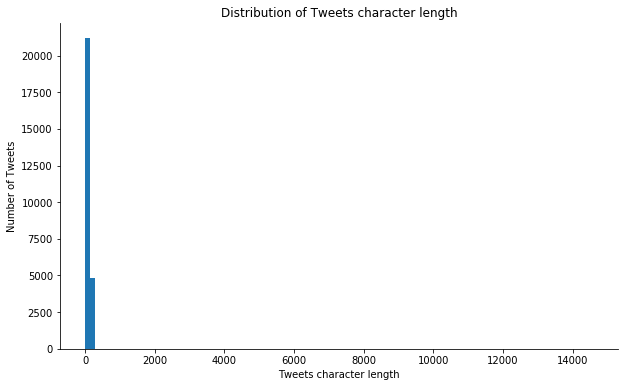

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

In [29]:
pd.set_option('display.max_colwidth', -1)
tweets_df_clean[tweets_df_clean.text.str.len() > 300]

text
4152   arguably greatest president history thank loudobbs 22 58 18 18260 71573 false 1265779391646187520twitter iphone request fbi department justice already well investigation sad tragic death minnesota george floyd 05 27 2020 22 39 56 50223 248351 false 1265774767493148672twitter iphone ask investigation expedite greatly appreciate work local law enforcement heart go georges family friends justice serve 05 27 2020 22 39 56 27518 141961 false 1265774770877902848twitter iphone fisa bill pass tonight house floor quickly veto country suffer greatest political crime history massive abuse fisa big part 05 27 2020 22 16 31 40542 164687 false 1265768877427851265twitter iphone thank nasa spacex hard work leadership look forward back saturday 05 27 2020 21 28 24 21793 152440 false 1265756765389418496twitter iphone rt nasa live history make watch nasa astronauts launchamerica space station american soil 05 27 2020 18 09 33 42217 0 false 1265706724121473025twitter iphone warrantless surveillance americans wrong 05 27 2020 18 09 14 58383 272602 false 1265706645134274561twitter iphone rt nasa welcome launch day live launchamerica coverage start 12 15pm et liftoff 4 33pm et let light candle 05 27 2020 16 36 34 8674 0 false 1265683323843686402twitter iphone rt realdonaldtrump obamagate make watergate look like small potatoes 05 27 2020 14 23 27 63937 0 false 1265649826504609792twitter iphone twitter show everything say compatriots correct big action follow 05 27 2020 14 22 20 67459 278015 false 1265649545410744321twitter iphone radical leave lamestream media together partner nothing democrats try spread new narrative president trump slow react covid 19 wrong fast even ban china long anybody think necessary 05 27 2020 13 19 37 29045 121073 false 1265633761024188417twitter iphone psycho joe scarborough rattle not bad rat things facts come internet open cold case know happen 05 27 2020 12 42 10 32739 129250 false 1265624335898869760twitter iphone pass 15000000 test today far world open safely 05 27 2020 11 59 01 25685 143230 false 1265613475809763328twitter iphone act police force not fight force afghanistan 19 years time police country bring soldier back home closely watch go strike thunder like never necessary 05 27 2020 11 54 46 29072 131410 false 1265612405784162304twitter iphone obamagate make watergate look like small potatoes 05 27 2020 11 38 48 63929 282198 false 1265608389905784834twitter iphone new paper make clear obama administration spy unprecedented manner trump campaign beyond even unite state senate nobody would ever believe level illegality corruption would take place beautiful usa 05 27 2020 11 31 43 40789 133420 false 1265606608211660801twitter iphone inform india china unite state ready able mediate arbitrate rag border dispute thank 05 27 2020 11 21 28 34747 183651 false 1265604027678670848twitter iphone happen like cant let large scale mail ballot take root country would free cheat forgery theft ballot whoever cheat would win likewise social media clean act 05 27 2020 11 11 53 23761 87913 false 1265601615261827072twitter iphone republicans feel social media platforms totally silence conservatives voice strongly regulate close ever allow happen saw attempt fail 2016 cant let sophisticate version 05 27 2020 11 11 52 37055 133798 false 1265601611310739456twitter iphone rt greggjarrett trump russia hoax paper come learn obama know everything 04 07 08 16114 0 false 1265494723592142848twitter iphone rt jsolomonreports break fbi open russia probe third hand suggestion collusion declassify memo show former fbi exec sa 05 27 2020 04 06 42 17356 0 false 1265494614011756547twitter iphone rt greggjarrett flynn attorney whole thing set within fbi oval office president obama 04 06 08 15603 0 false 1265494470436552704twitter iphone rt jsolomonreports declassifications continue white house hint new intel chief michael flynn document could rel 05 27 2020 04 01 25 11521 0 false 1265493283855360003twitter iphone rt jsolomonreports appa

In [30]:
tweets_df_clean[tweets_df_clean.text.str.len() > 300].shape

(36, 1)

In [31]:
# removed the 36 tweets with characterlength > 36
tweets_df_clean = tweets_df_clean[tweets_df_clean.text.str.len() < 300]

In [32]:
tweets_df_clean.shape

(26043, 1)

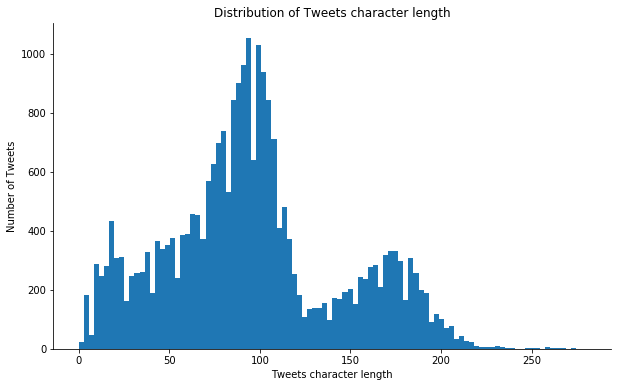

In [34]:
plt.figure(figsize=(10,6))
doc_lens = [len(d) for d in tweets_df_clean.text]
plt.hist(doc_lens, bins = 100)
plt.title('Distribution of Tweets character length')
plt.ylabel('Number of Tweets')
plt.xlabel('Tweets character length')
sns.despine();

#### wordcloud

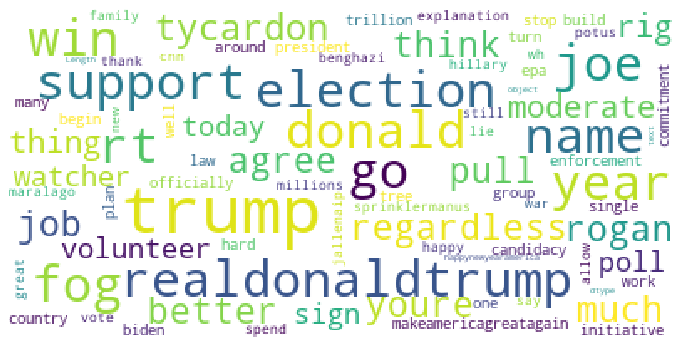

In [37]:
import matplotlib as mpl
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
mpl.rcParams['figure.figsize']=(12.0,12.0)  
mpl.rcParams['font.size']=12            
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=500,
                          max_font_size=40, 
                          random_state=100
                         ).generate(str(tweets_df_clean.text))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show();

#### trigrams

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3,3),stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(tweets_df_clean.text, 10)
trigram = pd.DataFrame(common_words, columns = ['trigram' , 'count'])

In [40]:
trigram

,trigram,count
0,make america great,357
1,fake news media,235
2,complete total endorsement,188
3,rt whitehouse president,154
4,rt jim jordan,134
5,crook hillary clinton,132
6,whitehouse president realdonaldtrump,129
7,rt whitehouse live,119
8,rt teamtrump president,113
9,teamtrump president realdonaldtrump,110


### topic modelling

In [41]:
# vectorise

from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(
    analyzer='word',       
    min_df=3,# minimum required occurences of a word 
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num chars > 3
    max_features=5000,# max number of unique words
    )

data_matrix = vectorizer.fit_transform(tweets_df_clean.text)
data_matrix

<26043x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 273113 stored elements in Compressed Sparse Row format>

In [42]:
# get topics 

lda_model = LatentDirichletAllocation(
    n_components=10, # Number of topics
    learning_method='online',
    random_state=2020,       
    n_jobs = -1  # Use all available CPUs
    )

lda_output = lda_model.fit_transform(data_matrix)

In [47]:
# visualise results

import warnings
warnings.filterwarnings("ignore")

import pyLDAvis
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
5      32.420952  8.115230   1       1        17.717522
7      0.648955   71.707100  2       1        10.930106
1      71.019684  9.971006   3       1        10.621691
6      3.785981   33.185135  4       1        10.160284
9     -42.666500 -9.222070   5       1        9.049630 
8     -3.621689  -43.526516  6       1        8.602457 
0     -3.632402  -4.171708   7       1        8.476621 
3     -36.584400  35.804413  8       1        8.471057 
2      44.391380  50.615383  9       1        8.007873 
4      40.235809 -31.591665  10      1        7.962759 , topic_info=     Category         Freq       Term        Total  loglift  logprob
1929  Default  4061.000000  great      4061.000000  30.0000  30.0000
4463  Default  2301.000000  thank      2301.000000  29.0000  29.0000
3432  Default  2523.000000  president  2523.000000  28.0000  28.0000
1231  Default  1578.000000  democrats  1578.000000  27.0000  27.0000
250   Default  1375.000000  america    1375.000000  26.0000  26.0000
...       ...          ...      ...            ...      ...      ...
4935  Topic10  212.558659   women      307.404744   2.1614  -4.6726 
4810  Topic10  483.424466   vote       1325.351800  1.5219  -3.8509 
2666  Topic10  180.752798   lose       413.461582   1.7030  -4.8346 
252   Topic10  209.991257   american   1012.663107  0.9571  -4.6847 
4836  Topic10  206.535625   want       1288.593444  0.6996  -4.7013 

[469 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
2     10     0.992520  100       
40    1      0.003106  2016      
40    2      0.997000  2016      
44    7      0.997728  2020      
117   9      0.995446  absolutely
...  ..           ...   ...      
4979  8      0.112558  years     
4979  9      0.295606  years     
4981  9      0.996920  yesterday 
4983  4      0.998136  york      
4997  7      0.992816  zero      

[570 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 8, 2, 7, 10, 9, 1, 4, 3, 5])

In [49]:
# get top 20 words by topic

for i,topic in enumerate(lda_model.components_):
    print(f'Top 20 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-20:]])
    print('\n')

Top 20 words for topic #0:
['base', '2020', 'tariff', 'bernie', 'family', 'presidential', 'election', 'joe', 'stand', 'biden', 'speak', 'trump', 'use', 'china', 'russia', 'say', 'amp', 'make', 'media', 'america']


Top 20 words for topic #1:
['true', 'change', 'sign', 'year', 'live', 'collusion', 'makeamericagreatagain', 'rat', 'lie', 'fail', 'foxnews', 'poll', 'today', 'party', 'republican', 'impeachment', 'whitehouse', 'trump', 'realdonaldtrump', 'president']


Top 20 words for topic #2:
['justice', 'isis', 'crowd', 'point', 'massive', 'america', 'yesterday', 'way', 'kill', 'close', 'years', 'senator', 'washington', 'fact', 'americans', 'continue', 'senate', 'trade', 'deal', 'know']


Top 20 words for topic #3:
['iowa', 'tonight', 'best', 'support', 'wonderful', 'love', 'book', 'night', 'rally', 'donald', 'tomorrow', 'florida', 'honor', 'realdonaldtrump', 'join', 'maga', 'make', 'today', 'thank', 'great']


Top 20 words for topic #4:
['want', 'american', 'south', 'women', 'jim', 'lif

In [51]:
# assign topic to each tweet
topic_values = lda_model.transform(data_matrix)
tweets_df_clean['topic'] = topic_values.argmax(axis=1)

In [52]:
tweets_df_clean

,text,topic
0,rt tycardon regardless youre pull think agree joe rogan would much better job moderate thing,5
1,rt realdonaldtrump rig election,5
2,volunteer trump election poll watcher sign today makeamericagreatagain,1
3,epa one trillion tree initiative build president donald trump commitment,3
4,joe biden could not name single law enforcement group support candidacy,0
...,...,...
26074,well year officially begin many stop plan work hard win turn country around,5
26075,sprinklermanus cnn realdonaldtrump spend millions still go win go donald trump,5
26076,jallenaip hillary say fog war explanation lie benghazi no fog allow wh vote trump potus,1
26077,happy new year maralago thank great family support,3


In [55]:
tweets_df_clean.drop(columns = 'text', inplace =True)

In [56]:
tweets_df_clean

,topic
0,5
1,5
2,1
3,3
4,0
...,...
26074,5
26075,5
26076,1
26077,3


In [61]:
df_topic = pd.merge(df, tweets_df_clean, left_index=True, right_index=True).reset_index(drop=True)

In [62]:
df_topic

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str,hashtag,mention,created_date,created_time,passedClosing,Date,^GSPC,VGT,topic
0,Twitter for iPhone,RT @TyCardon: Regardless who you’re pulling for I think we can all agree that Joe Rogan would do a much better job moderating this thing t…,2020-09-29 22:51:43,30926,0,True,1311136617327984640,[],[],2020-09-29,22:51:43,1,2020-09-30,0.008220,0.007412,5
1,Twitter for iPhone,RT @realDonaldTrump: Rigged Election!,2020-09-29 22:37:44,66647,0,True,1311133095651717123,[],[],2020-09-29,22:37:44,1,2020-09-30,0.008220,0.007412,5
2,Twitter for iPhone,Volunteer to be a Trump Election Poll Watcher. Sign up today! #MakeAmericaGreatAgain,2020-09-29 22:30:39,14609,48540,False,1311131311965306885,['#MakeAmericaGreatAgain'],[],2020-09-29,22:30:39,1,2020-09-30,0.008220,0.007412,1
3,Twitter for iPhone,“EPA: One Trillion Trees Initiative will build on President Donald Trump’s commitment”,2020-09-29 22:26:18,10408,36582,False,1311130217348345856,[],[],2020-09-29,22:26:18,1,2020-09-30,0.008220,0.007412,3
4,Twitter for iPhone,Joe Biden could not name a single Law Enforcement group that supports his candidacy!,2020-09-29 22:15:30,4988,20767,False,1311127502954196993,[],[],2020-09-29,22:15:30,1,2020-09-30,0.008220,0.007412,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26038,Twitter for Android,Well the year has officially begun. I have many stops planned and will be working very hard to win so that we can turn our country around!,2016-01-01 18:00:09,2642,8495,False,683060169677344768,[],[],2016-01-01,18:00:09,1,2016-01-04,-0.015422,-0.015635,5
26039,Twitter for Android,@sprinklermanus: @CNN @realDonaldTrump they're spending millions but you're still going to win - go Donald Trump,2016-01-01 16:29:56,933,3330,False,683037464504745985,[],"['@sprinklermanus', '@CNN', '@realDonaldTrump']",2016-01-01,16:29:56,1,2016-01-04,-0.015422,-0.015635,5
26040,Twitter for Android,"@jallenaip: Hillary said she was in a Fog of War"" as explanation for the lies about Benghazi. No fog allowed in WH. Vote Trump POTUS!""",2016-01-01 01:08:06,2721,7490,False,682805477168779264,[],['@jallenaip'],2016-01-01,01:08:06,0,2016-01-04,-0.015422,-0.015635,1
26041,Twitter for iPhone,Happy New Year from #MarALago! Thank you to my great family for all of their support.,2016-01-01 01:07:28,1948,8258,False,682805320217980929,['#MarALago'],[],2016-01-01,01:07:28,0,2016-01-04,-0.015422,-0.015635,3


In [8]:
#df_topic.to_csv('../data/tweets&logreturns&topic.csv/')